<a href="https://colab.research.google.com/github/aeyeniay/AdvancedProject2/blob/main/AP_Tirta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
%matplotlib inline
from warnings import simplefilter
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import shap
shap.initjs()

In [127]:
simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [128]:
df = pd.read_csv(
    "Rice-Data-2018-2021.csv",
    index_col='Date',
    parse_dates=['Date'],
)

df.head()

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   

            Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
Date                                                                    
2018-01-01                            9792.59                    0.54   
2018-02-01                            9987.10                    1.07   
2018-03-01                            9554.06                    1.77   
2018-04-01                            8991.36                    1.41   
2018-05-01                            9001.50                    1.00   

            Produksi Padi Nasional (10^6 Ton)  \
Date                                            
2018-01-01                               2.78   
2018-02-01                               5.74   
2018-03-01                               9.68   
2018-04-01                               7.60   
2018-05-01                               4.90   

            Produksi Beras Nasional (10^6 Ton)  
Date                                            
2018-01-01                                1.59  
2018-02-01                                3.29  
2018-03-01                                5.55  
2018-04-01                                4.36  
2018-05-01                                2.81

In [129]:
df['Time'] = np.arange(len(df.index))
df

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   
2018-06-01                                9478.05   
2018-07-01                                9519.93   
2018-08-01                                9458.07   
2018-09-01                                9572.03   
2018-10-01                                9645.30   
2018-11-01                                9770.97   
2018-12-01                                9818.07   
2019-01-01                               10111.08   
2019-02-01                               10007.91   
2019-03-01                                9814.53   
2019-04-01                                9464.68   
2019-05-01                                9462.05   
2019-06-01                                9515.51   
2019-07-01                                9519.35   
2019-08-01                                9530.00   
2019-09-01                                9594.39   
2019-10-01                                9659.17   
2019-11-01                                9742.16   
2019-12-01                                9838.26   
2020-01-01                               10032.66   
2020-02-01                               10080.80   
2020-03-01                               10082.43   
2020-04-01                               10018.19   
2020-05-01                                9826.63   
2020-06-01                                9918.95   
2020-07-01                                9931.71   
2020-08-01                                9962.65   
2020-09-01                                9871.12   
2020-10-01                                9812.90   
2020-11-01                                9714.50   
2020-12-01                                9787.86   
2021-01-01                                9780.19   
2021-02-01                                9772.10   
2021-03-01                                9606.97   
2021-04-01                                9549.76   
2021-05-01                                9627.08   
2021-06-01                                9537.16   
2021-07-01                                9401.61   
2021-08-01                                9499.36   
2021-09-01                                9455.56   
2021-10-01                                9449.47   
2021-11-01                                9539.29   
2021-12-01                                9672.54   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   
2018-06-01                               9135.41   
2018-07-01                               9197.78   
2018-08-01                               9172.27   
2018-09-01                               9309.98   
2018-10-01                               9395.39   
2018-11-01                               9603.63   
2018-12-01                               9798.38   
2019-01-01                               9902.68   
2019-02-01                               9799.57   
2019-03-01                               9555.35   
2019-04-01                               9144.20   
2019-05-01                               9142.52   
2019-06-01                               9166.40   
2019-07-01                               9211.03   
2019-08-01                               9224.00   
2019-09-01                               9301.08   
2019-10-01                               9433.88   
2019-11-01                               9522.01   
2019-12-01                               9565.59   
2020-01-0

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-01-01 to 2021-12-01
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Average Price of Premium Quality Rice  48 non-null     float64
 1   Average Price of Medium Quality Rice   48 non-null     float64
 2   Average Price of Bad Quality Rice      48 non-null     float64
 3   Harvest Area (10^6 ha)                 48 non-null     float64
 4   Produksi Padi Nasional (10^6 Ton)      48 non-null     float64
 5   Produksi Beras Nasional (10^6 Ton)     48 non-null     float64
 6   Time                                   48 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 3.0 KB


In [131]:
# Training data
Waktu = df.loc[:, ['Time']]  # features
x = df[['Harvest Area (10^6 ha)','Produksi Padi Nasional (10^6 Ton)','Produksi Beras Nasional (10^6 Ton)','Time']] # features
HargaBerasPremium = df.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium = df.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas = df.loc[:, 'Average Price of Bad Quality Rice'] # target

### SIMPLE LINEAR REGRESSION
### Average Price of Premium Quality Rice

Coefficients:  [-3.93001465]
Intercept:  9824.14805272109


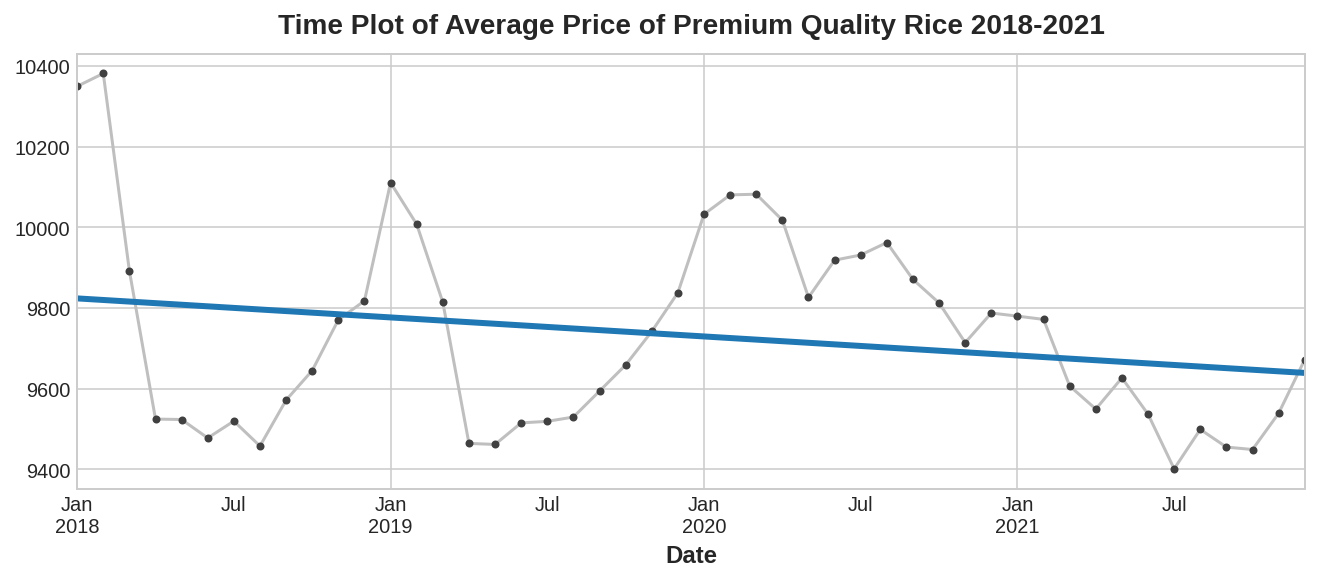

In [132]:
# Train the model
model = LinearRegression()
model.fit(Waktu, HargaBerasPremium)

# Koefisien model
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPricePremium_pred = pd.Series(model.predict(Waktu), index=Waktu.index)

ax = HargaBerasPremium.plot(**plot_params)
ax = AvgPricePremium_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2018-2021');

In [133]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPricePremium_pred - HargaBerasPremium)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPricePremium_pred - HargaBerasPremium) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasPremium , AvgPricePremium_pred))
errors = abs(AvgPricePremium_pred - HargaBerasPremium)
mape = 100 * (errors / HargaBerasPremium)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean absolute error: 195.41
Residual sum of squares (MSE): 53848.01
R2-score: 0.05
Accuracy: 98.0 %.


### Multiple Linear Regression
### Average Price of Premium Quality Rice

Coefficients:  [101.48305493  18.36526609 -95.37296957  -4.28616587]
Intercept:  9913.073074039452


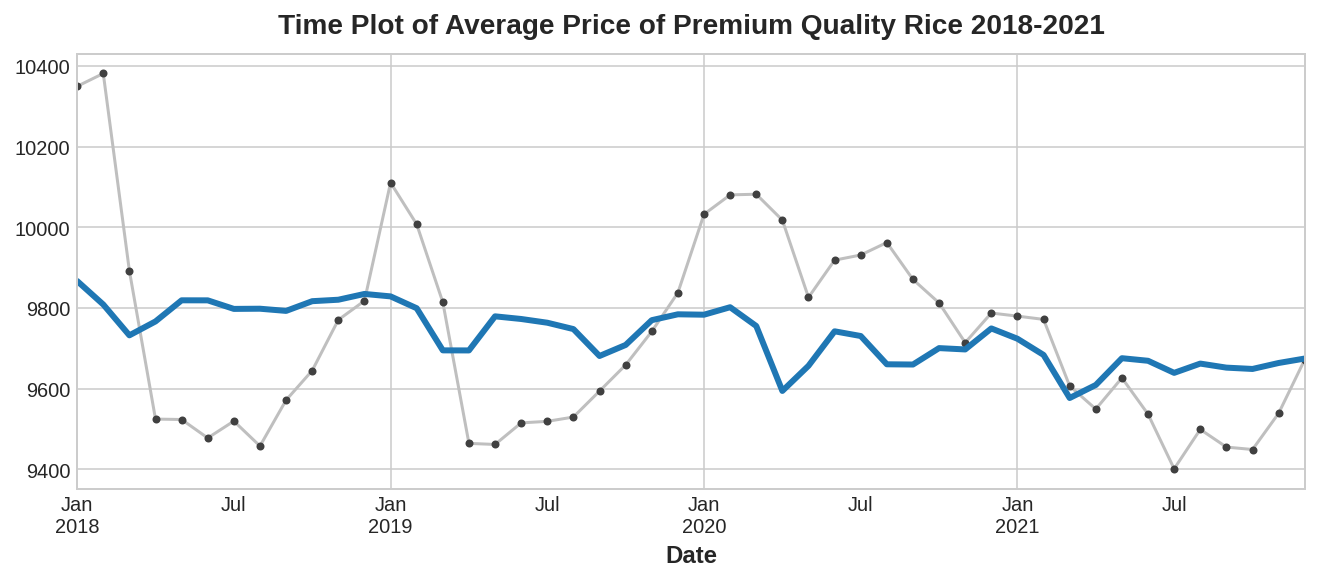

In [134]:
regr = LinearRegression()
regr.fit(x,HargaBerasPremium)

print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

AvgPricePremium_pred_v2 = pd.Series(regr.predict(x), index=Waktu.index)

ax = HargaBerasPremium.plot(**plot_params)
ax = AvgPricePremium_pred_v2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2018-2021');

In [135]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPricePremium_pred_v2 - HargaBerasPremium)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPricePremium_pred_v2 - HargaBerasPremium) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasPremium , AvgPricePremium_pred_v2))
errors = abs(AvgPricePremium_pred_v2 - HargaBerasPremium)
mape = 100 * (errors / HargaBerasPremium)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean absolute error: 189.85
Residual sum of squares (MSE): 51882.77
R2-score: 0.09
Accuracy: 98.06 %.


In [136]:
explainer = shap.LinearExplainer(regr, x)
shap_values = explainer.shap_values(x)

In [137]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x)

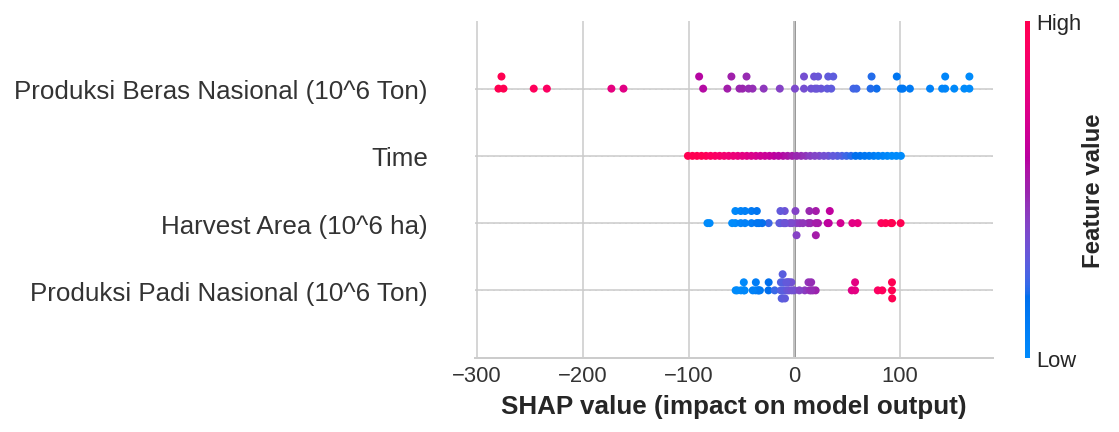

In [138]:
shap.summary_plot(shap_values, x)

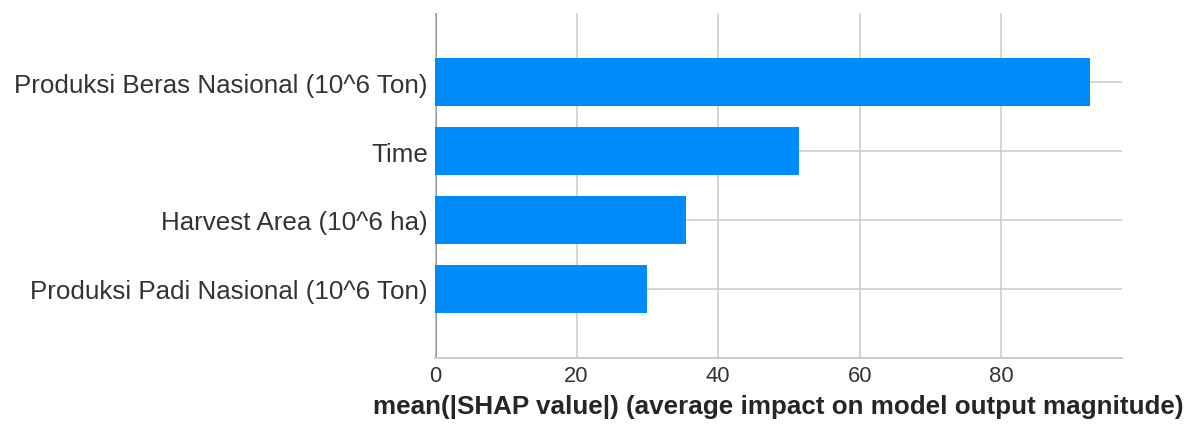

In [139]:
shap.summary_plot(shap_values, x, plot_type ="bar")

    A high level of the Produksi Beras Nasional has a high and positive impact on the Average Price of Premium Quality Rice'.
---

## Random Forest
### Average Price of Premium Quality Rice

In [140]:
# Train the model
regressor = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor.fit(x, HargaBerasPremium)
predict = regressor.predict(x)
print(predict)
print(predict.shape)

[10275.24037 10171.20562  9998.59197  9598.72033  9527.24446  9500.48431
  9508.50877  9482.99446  9542.73634  9695.02088  9772.03326  9874.23589
  9999.01575  9887.13594  9726.97252  9584.4327   9495.06845  9519.96989
  9518.68727  9541.48094  9616.01473  9702.13612  9787.75583  9875.69298
  9970.17382  9998.45614  9998.05766  9957.07678  9866.58032  9892.44888
  9853.11447  9908.50145  9830.14779  9794.42642  9737.78551  9797.5489
  9813.86268  9744.24571  9686.70361  9577.51554  9610.65813  9547.50028
  9458.20559  9491.75463  9474.1644   9494.14558  9579.48434  9687.61853]
(48,)


In [141]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(HargaBerasPremium, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(HargaBerasPremium, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(HargaBerasPremium, predict)), 4))
print("R2-score: %.2f" % r2_score(HargaBerasPremium, predict) )
errors = abs(predict - HargaBerasPremium)
mape = 100 * (errors / HargaBerasPremium)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 47.1091
Mean Squared Error: 3812.2154
Root Mean Squared Error: 61.7431
R2-score: 0.93
Accuracy: 99.52 %.


In [142]:
AvgPricePremium_pred_with_randomforest = pd.Series(predict, index=x.index)

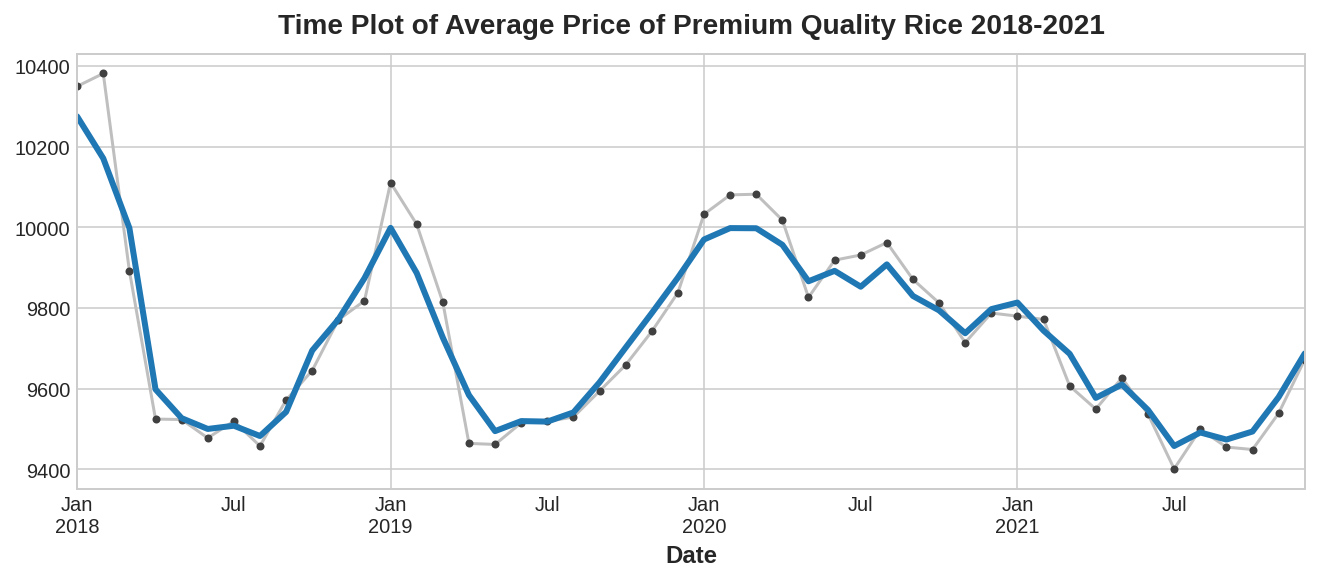

In [143]:
ax = HargaBerasPremium.plot(**plot_params)
ax = AvgPricePremium_pred_with_randomforest.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2018-2021');

In [144]:
# explain the model's predictions using SHAP
explainer4 = shap.TreeExplainer(regressor)
shap_values4 = explainer.shap_values(x)

In [145]:
shap.initjs()
shap.force_plot(explainer4.expected_value, shap_values4, x)

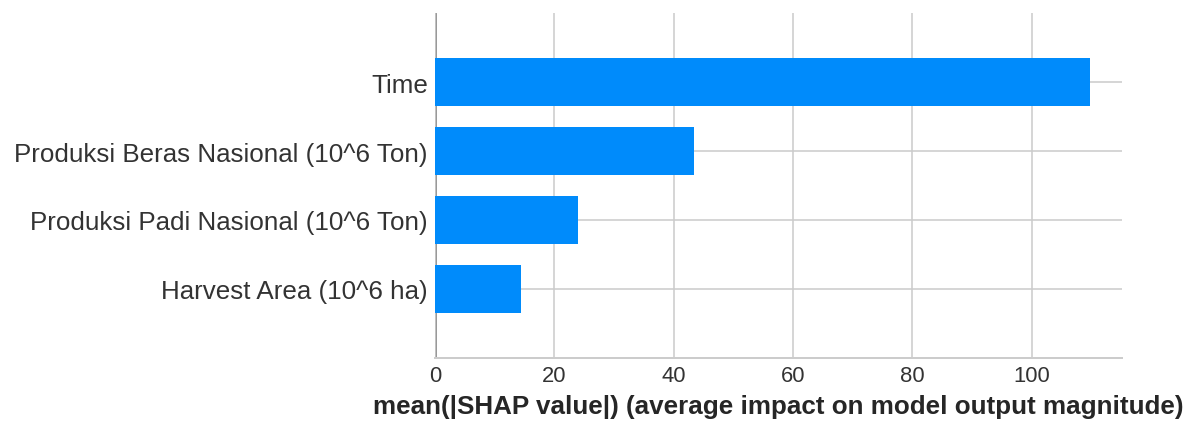

In [146]:
shap_values5 = shap.TreeExplainer(regressor).shap_values(x)
shap.summary_plot(shap_values5, x, plot_type="bar")

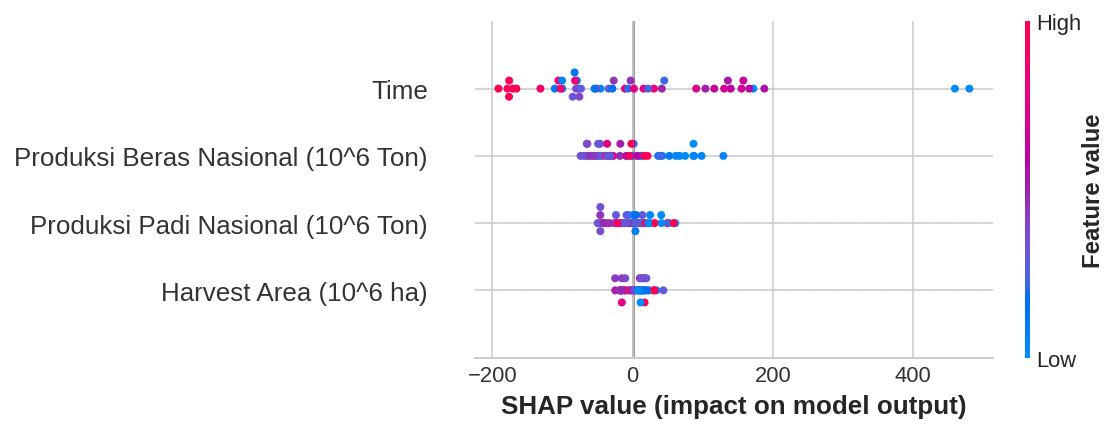

In [147]:
shap.summary_plot(shap_values5, x)

### SIMPLE LINEAR REGRESSION
### Average Price of Medium Quality Rice

Coefficients:  [-11.65526596]
Intercept:  9653.152083333334


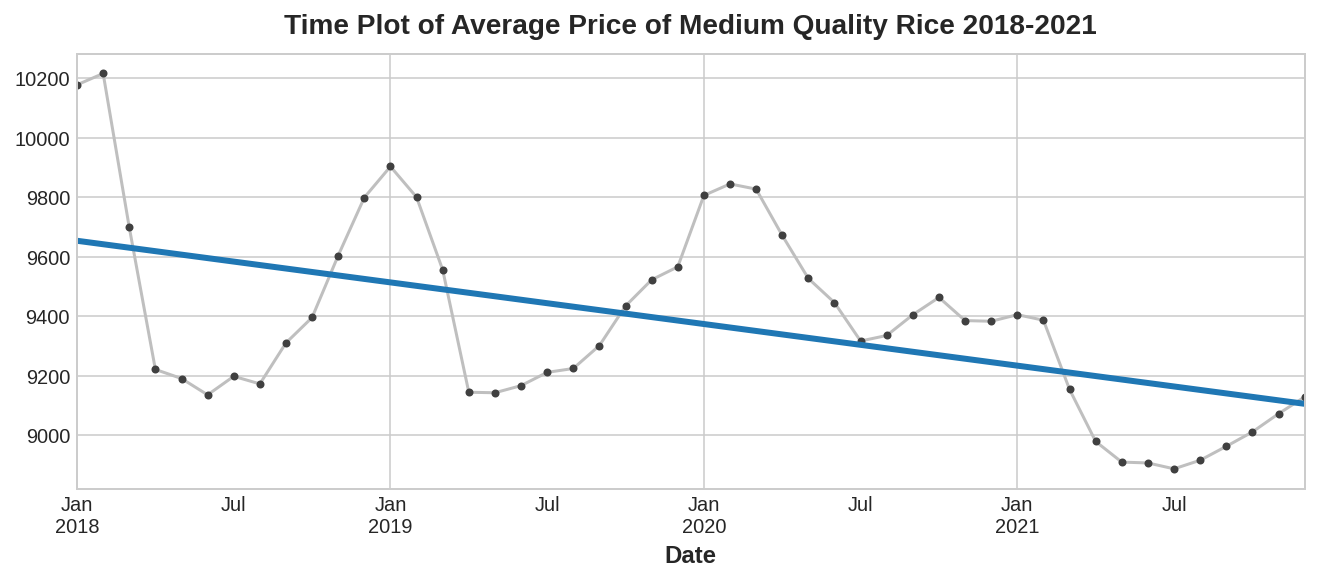

In [148]:
# Train the model
model2 = LinearRegression()
model2.fit(Waktu, HargaBerasMedium)

# Koefisien model
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPriceMedium_pred = pd.Series(model2.predict(Waktu), index=Waktu.index)

ax = HargaBerasMedium.plot(**plot_params)
ax = AvgPriceMedium_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Quality Rice 2018-2021');

In [149]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPriceMedium_pred - HargaBerasMedium)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPriceMedium_pred - HargaBerasMedium) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasMedium , AvgPriceMedium_pred))
errors_2 = abs(AvgPriceMedium_pred - HargaBerasMedium)
mape_2 = 100 * (errors_2 / HargaBerasMedium)
accuracy_2 = 100 - np.mean(mape_2)
print('Accuracy:', round(accuracy_2, 2), '%.') 

Mean absolute error: 235.11
Residual sum of squares (MSE): 76462.38
R2-score: 0.25
Accuracy: 97.51 %.


### Multiple Linear Regression
### Average Price of Medium Quality Rice

Coefficients:  [-44.25144594  25.99444889 -83.18312011 -12.2897457 ]
Intercept:  9807.504802051759


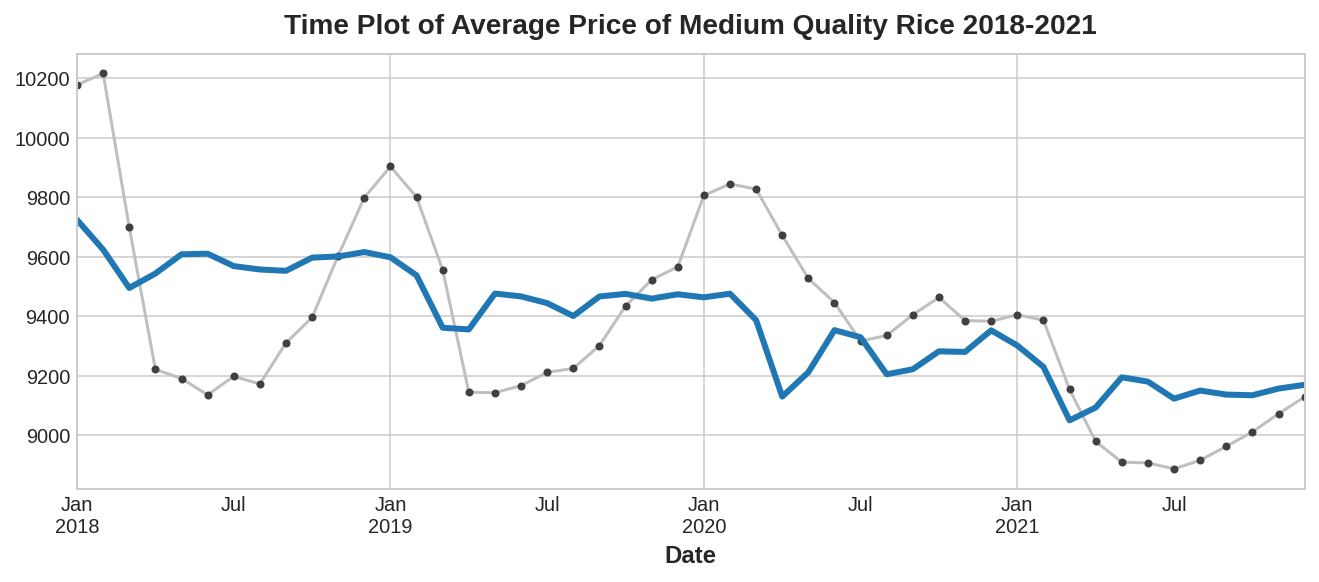

In [150]:
regr_v2 = LinearRegression()
regr_v2.fit(x,HargaBerasMedium)

print('Coefficients: ', regr_v2.coef_)
print ('Intercept: ',regr_v2.intercept_)

AvgPriceMedium_pred_v2 = pd.Series(regr_v2.predict(x), index=Waktu.index)

ax = HargaBerasMedium.plot(**plot_params)
ax = AvgPriceMedium_pred_v2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Quality Rice 2018-2021');

In [151]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPriceMedium_pred_v2 - HargaBerasMedium)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPriceMedium_pred_v2 - HargaBerasMedium) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasMedium , AvgPriceMedium_pred_v2))
errors = abs(AvgPriceMedium_pred_v2 - HargaBerasMedium)
mape = 100 * (errors / HargaBerasMedium)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean absolute error: 226.99
Residual sum of squares (MSE): 71100.09
R2-score: 0.31
Accuracy: 97.59 %.


In [152]:
explainer_v2 = shap.LinearExplainer(regr_v2, x)
shap_values_v2 = explainer_v2.shap_values(x)

In [153]:
shap.initjs()
shap.force_plot(explainer_v2.expected_value, shap_values_v2, x)

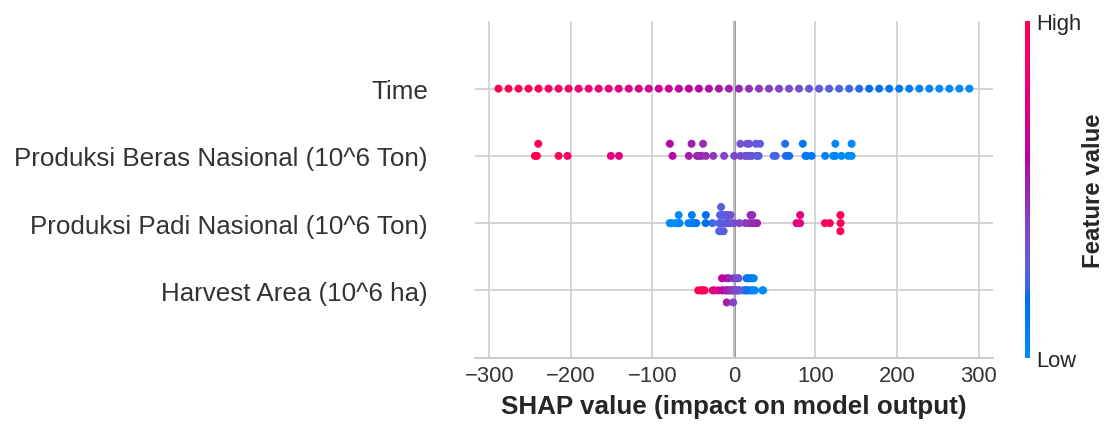

In [154]:
shap.summary_plot(shap_values_v2, x)

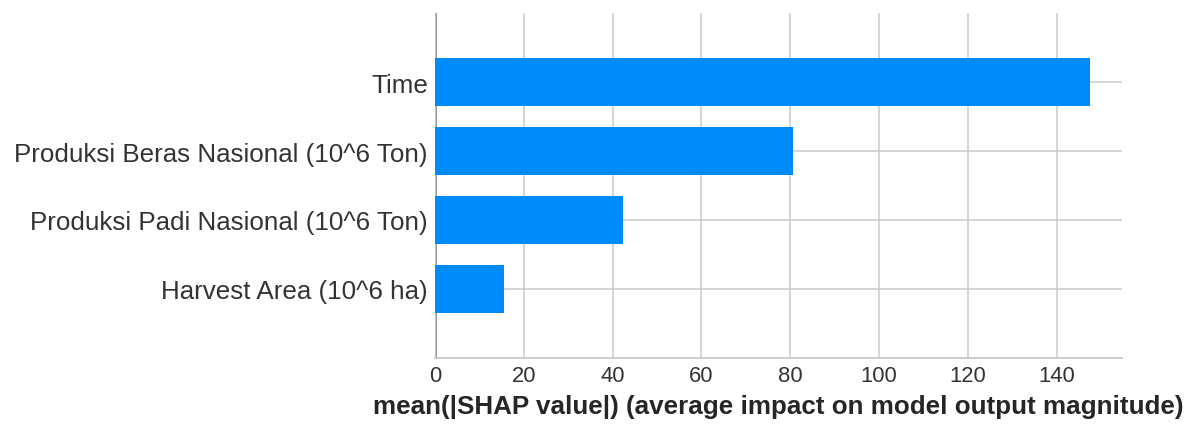

In [155]:
shap.summary_plot(shap_values_v2, x, plot_type ="bar")

## Random Forest
### Average Price of Medium Quality Rice

In [156]:
# Train the model
regressor2 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor2.fit(x, HargaBerasMedium)
predict2 = regressor2.predict(x)
print(predict2)
print(predict2.shape)

[10084.89458  9919.78228  9801.23396  9311.33159  9211.6733   9161.93231
  9196.22017  9189.81311  9267.35584  9462.38491  9607.30121  9785.18619
  9820.34543  9641.06547  9471.61909  9302.93191  9169.5399   9183.76656
  9198.63605  9232.77243  9329.41848  9463.19258  9569.69042  9638.5619
  9742.10217  9709.93811  9681.35455  9593.12394  9491.91929  9479.77206
  9340.53147  9358.06269  9376.40917  9421.79387  9406.90468  9440.1584
  9486.89451  9365.86427  9259.55903  9032.56695  8932.00647  8914.78358
  8906.32187  8917.91333  8949.73238  8988.93316  9087.53149  9142.24281]
(48,)


In [157]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(HargaBerasMedium, predict2), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(HargaBerasMedium, predict2), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(HargaBerasMedium, predict2)), 4))
print("R2-score: %.2f" % r2_score(HargaBerasMedium, predict2) )
errors = abs(predict2 - HargaBerasMedium)
mape = 100 * (errors / HargaBerasMedium)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 53.4525
Mean Squared Error: 5820.6995
Root Mean Squared Error: 76.2935
R2-score: 0.94
Accuracy: 99.44 %.


In [158]:
AvgPriceMedium_pred_with_randomforest = pd.Series(predict2, index=x.index)

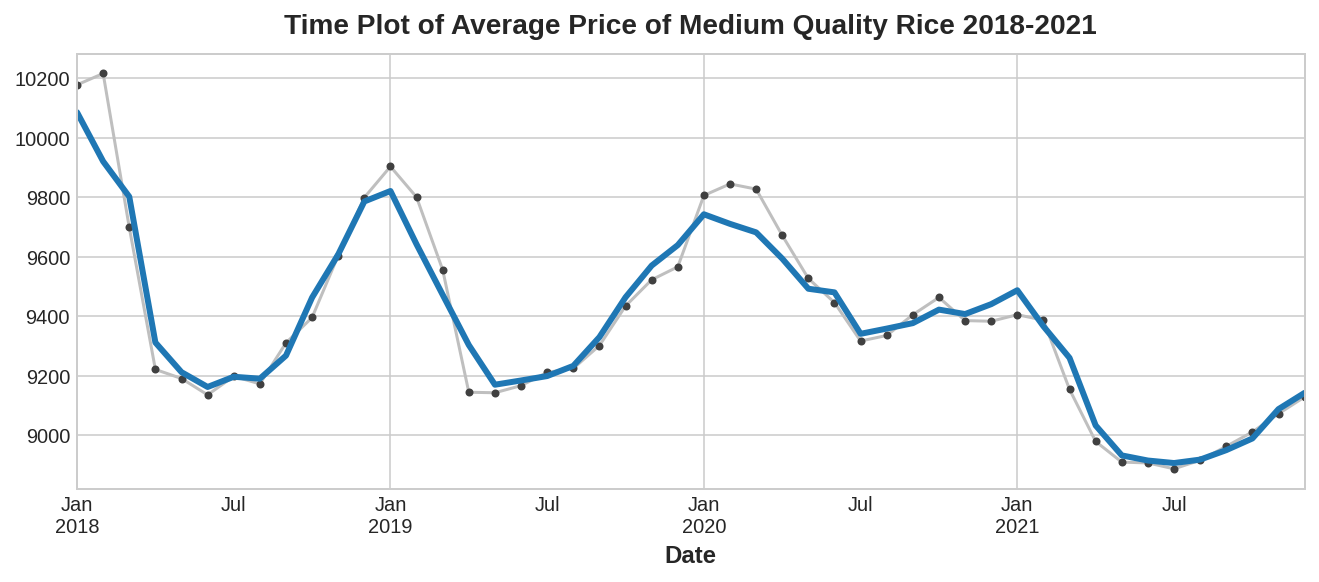

In [159]:
ax = HargaBerasMedium.plot(**plot_params)
ax = AvgPriceMedium_pred_with_randomforest.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Quality Rice 2018-2021');

In [160]:
# explain the model's predictions using SHAP
explainer5 = shap.TreeExplainer(regressor2)
shap_values5 = explainer.shap_values(x)

In [161]:
shap.initjs()
shap.force_plot(explainer4.expected_value, shap_values5, x)

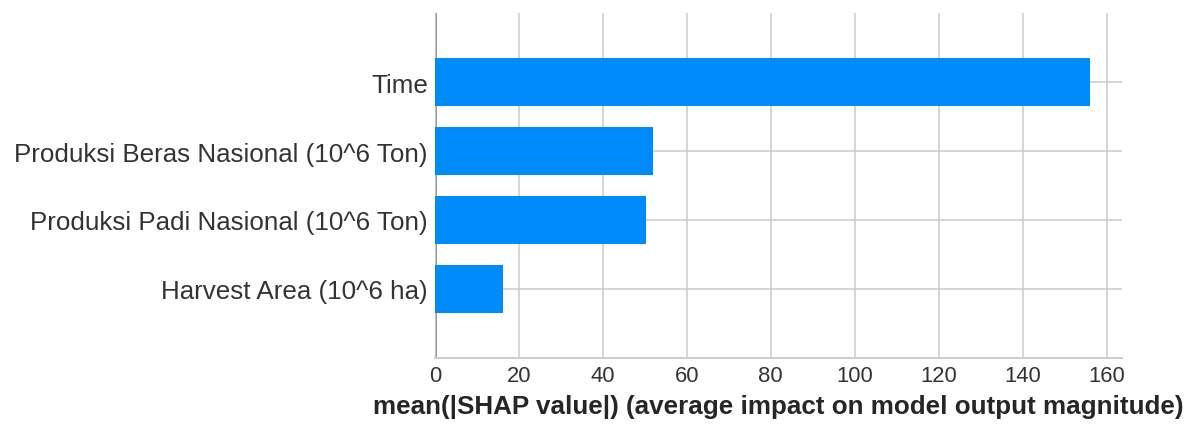

In [162]:
shap_values6 = shap.TreeExplainer(regressor2).shap_values(x)
shap.summary_plot(shap_values6, x, plot_type="bar")

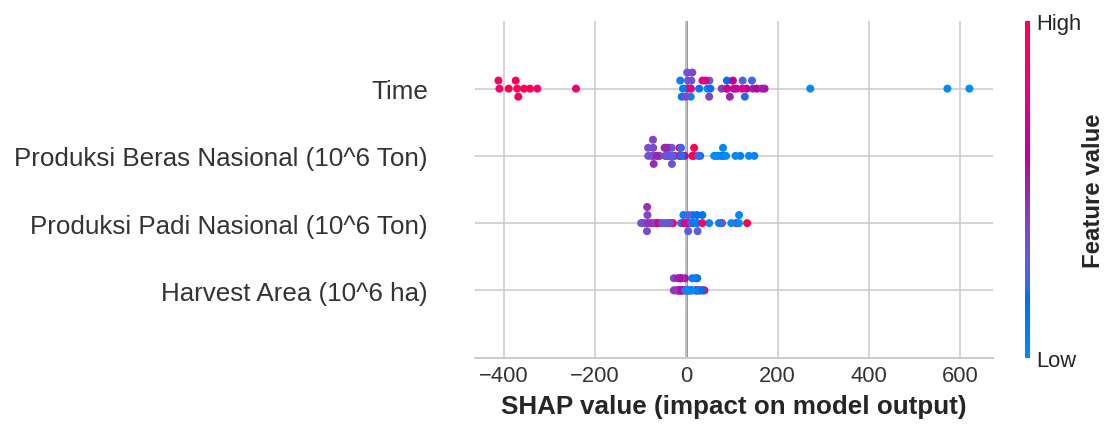

In [163]:
shap.summary_plot(shap_values6, x)

### SIMPLE LINEAR REGRESSION
### Average Price of Bad Quality Rice

Coefficients:  [-14.65497395]
Intercept:  9429.6068877551


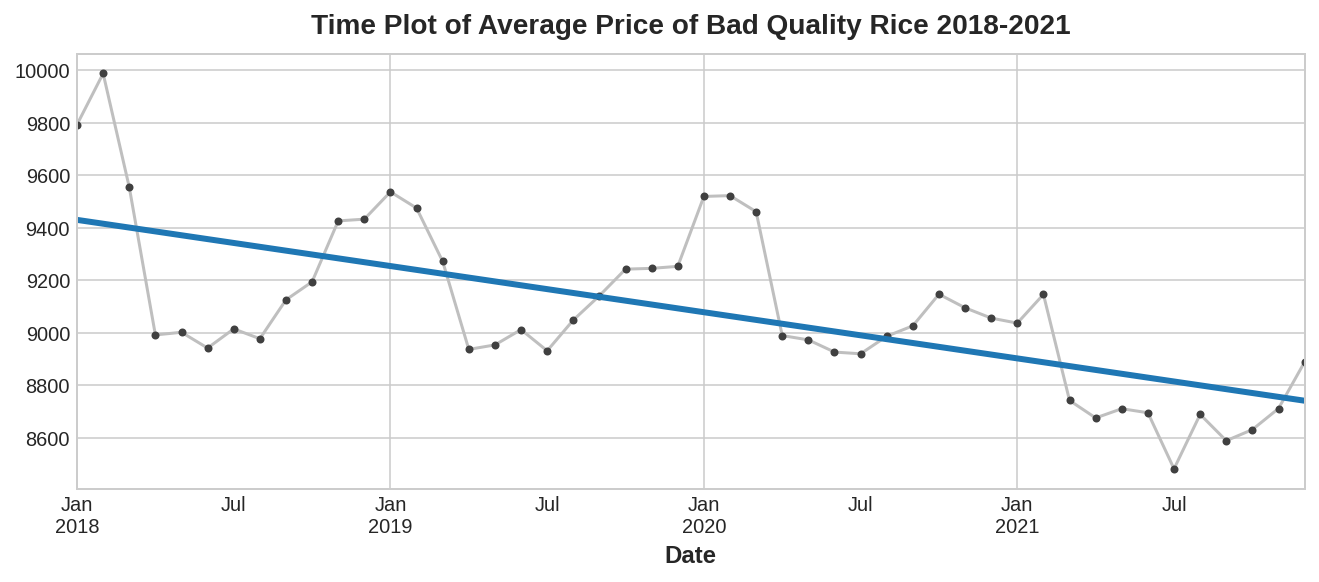

In [164]:
# Train the model
model3 = LinearRegression()
model3.fit(Waktu, HargaBerasLuarkualitas)

# Koefisien model
print ('Coefficients: ', model3.coef_)
print ('Intercept: ',model3.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPriceBad_pred = pd.Series(model3.predict(Waktu), index=Waktu.index)

ax = HargaBerasLuarkualitas.plot(**plot_params)
ax = AvgPriceBad_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Bad Quality Rice 2018-2021');

In [165]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPriceBad_pred - HargaBerasLuarkualitas)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPriceBad_pred - HargaBerasLuarkualitas) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasLuarkualitas , AvgPriceBad_pred) )
errors_3 = abs(AvgPriceBad_pred - HargaBerasLuarkualitas)
mape_3 = 100 * (errors_3 / HargaBerasLuarkualitas)
accuracy_3 = 100 - np.mean(mape_3)
print('Accuracy:', round(accuracy_3, 2), '%.') 

Mean absolute error: 200.56
Residual sum of squares (MSE): 57286.18
R2-score: 0.42
Accuracy: 97.81 %.


### Multiple Linear Regression
### Average Price of Bad Quality Rice

Coefficients:  [-201.23519909   53.40351353  -88.050911    -15.35206235]
Intercept:  9607.675210967485


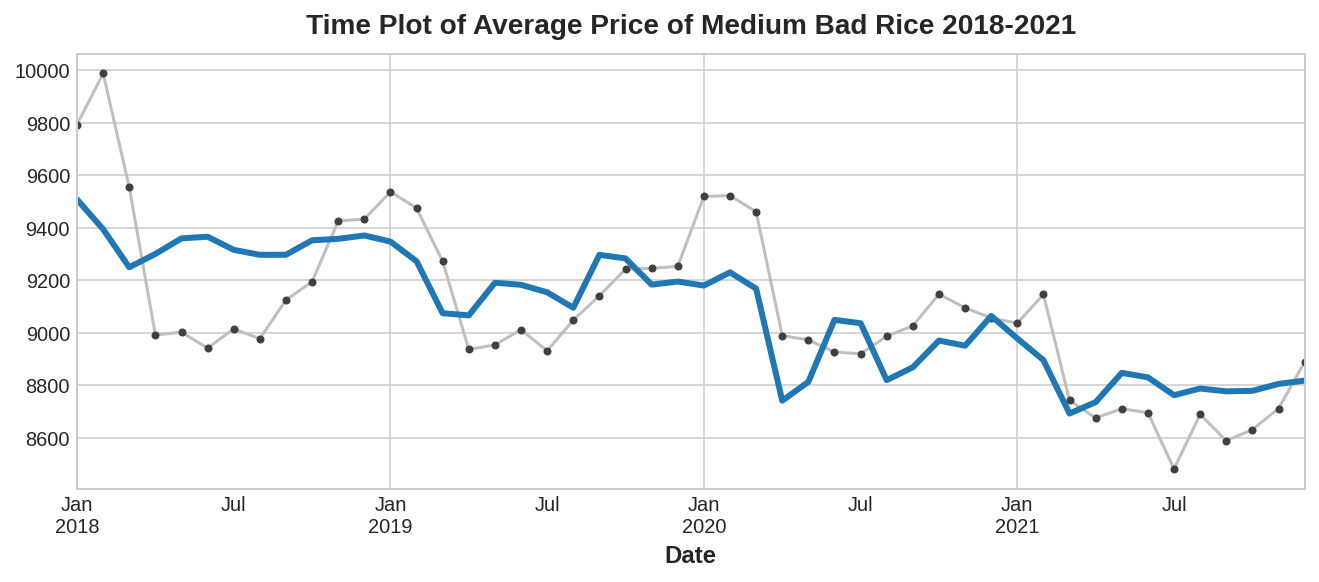

In [166]:
regr_v3 = LinearRegression()
regr_v3.fit(x,HargaBerasLuarkualitas)

print('Coefficients: ', regr_v3.coef_)
print ('Intercept: ',regr_v3.intercept_)

AvgPriceBad_pred_v2 = pd.Series(regr_v3.predict(x), index=Waktu.index)

ax = HargaBerasLuarkualitas.plot(**plot_params)
ax = AvgPriceBad_pred_v2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Bad Rice 2018-2021');

In [167]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPriceBad_pred_v2 - HargaBerasLuarkualitas)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPriceBad_pred_v2 - HargaBerasLuarkualitas) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasMedium , AvgPriceBad_pred_v2))
errors = abs(AvgPriceBad_pred_v2 - HargaBerasLuarkualitas)
mape = 100 * (errors / HargaBerasLuarkualitas)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean absolute error: 184.62
Residual sum of squares (MSE): 47143.90
R2-score: -0.57
Accuracy: 97.98 %.


In [168]:
explainer_v3 = shap.LinearExplainer(regr_v3, x)
shap_values_v3 = explainer_v3.shap_values(x)

In [169]:
shap.initjs()
shap.force_plot(explainer_v3.expected_value, shap_values_v3, x)

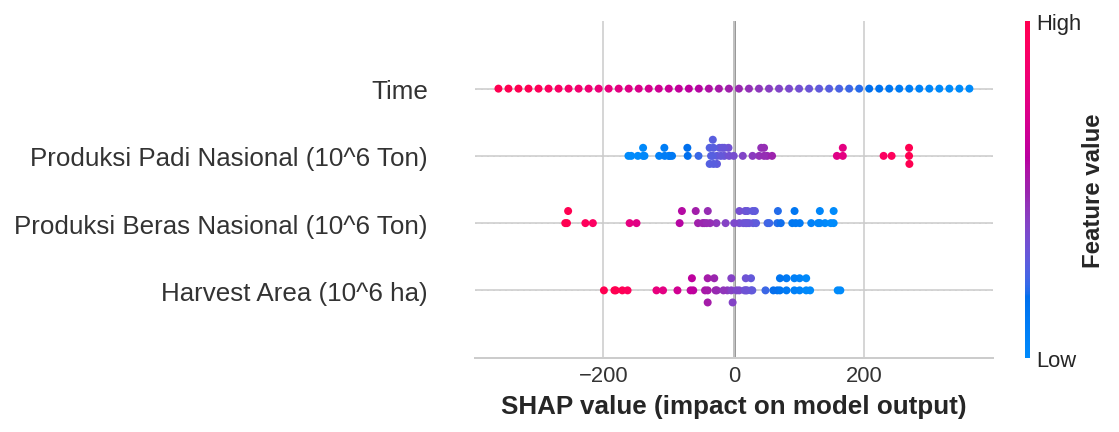

In [170]:
shap.summary_plot(shap_values_v3, x)

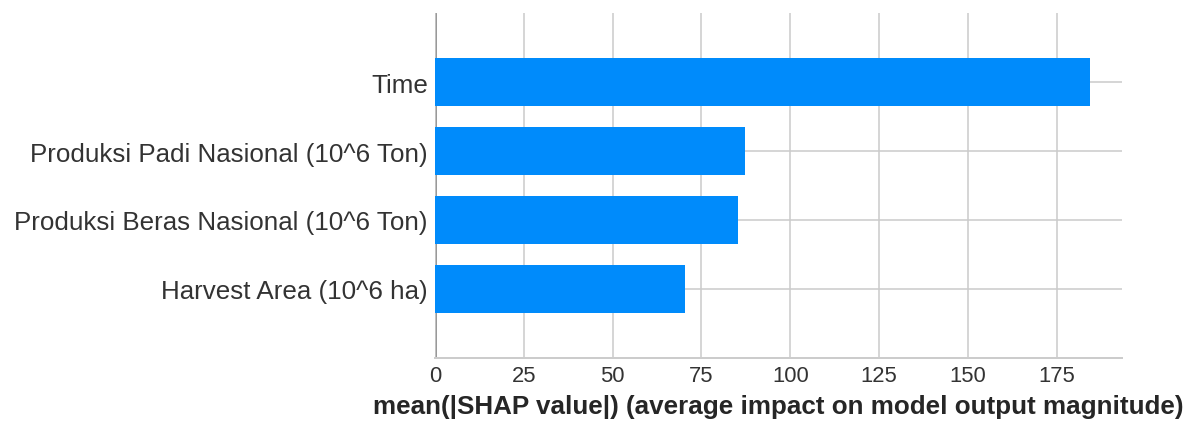

In [171]:
shap.summary_plot(shap_values_v3, x, plot_type ="bar")

## Random Forest
### Average Price of Bad Quality Rice

In [172]:
# Train the model
regressor3 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor3.fit(x, HargaBerasLuarkualitas)
predict3 = regressor3.predict(x)
print(predict3)
print(predict3.shape)

[9781.68958 9727.32439 9629.93892 9180.11904 9030.53117 8964.25709
 9011.19214 8997.55416 9081.21878 9250.0144  9380.81137 9442.24303
 9480.64871 9332.64047 9200.17917 9062.69098 8974.33586 9004.57907
 8954.21459 9025.61968 9165.45831 9241.37142 9293.50125 9324.65235
 9439.58248 9391.5264  9348.59103 9019.97489 8983.44723 9042.47317
 8944.00936 8991.94727 9024.07917 9093.41662 9113.36358 9094.23578
 9111.54501 9070.99429 8877.02534 8689.32511 8696.41633 8685.28856
 8549.09781 8656.03784 8619.46289 8644.99805 8750.04335 8831.80406]
(48,)


In [173]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(HargaBerasLuarkualitas, predict3), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(HargaBerasLuarkualitas, predict3), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(HargaBerasLuarkualitas, predict3)), 4))
print("R2-score: %.2f" % r2_score(HargaBerasLuarkualitas, predict3) )
errors = abs(predict3 - HargaBerasLuarkualitas)
mape = 100 * (errors / HargaBerasLuarkualitas)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 53.4793
Mean Squared Error: 5608.8967
Root Mean Squared Error: 74.8926
R2-score: 0.94
Accuracy: 99.42 %.


In [174]:
AvgPriceBad_pred_with_randomforest = pd.Series(predict3, index=x.index)

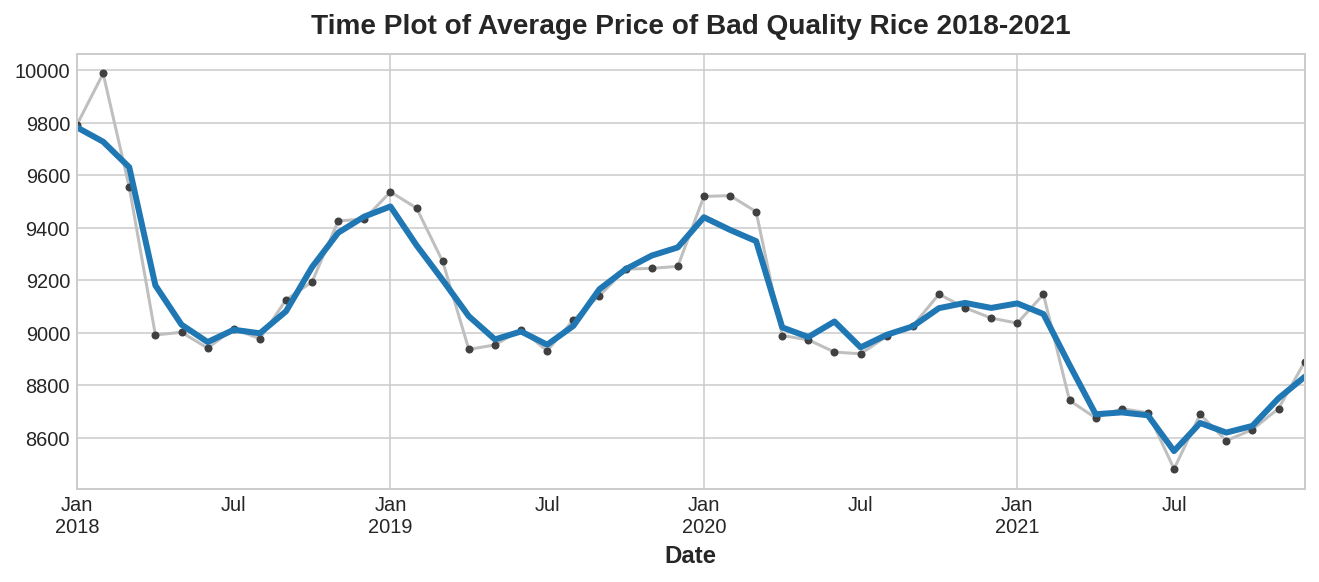

In [175]:
ax = HargaBerasLuarkualitas.plot(**plot_params)
ax = AvgPriceBad_pred_with_randomforest.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Bad Quality Rice 2018-2021');

In [176]:
# explain the model's predictions using SHAP
explainer5 = shap.TreeExplainer(regressor3)
shap_values5 = explainer.shap_values(x)

In [177]:
shap.initjs()
shap.force_plot(explainer5.expected_value, shap_values5, x)

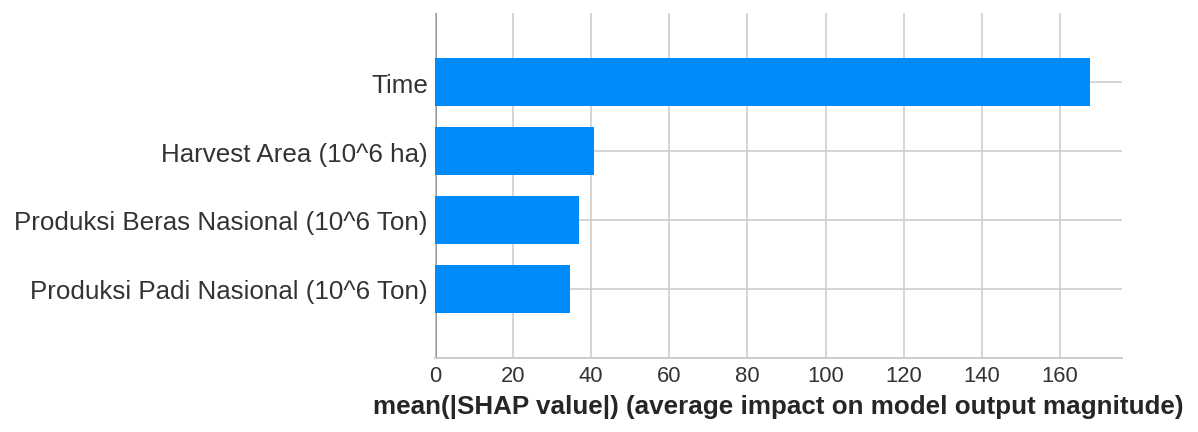

In [178]:
shap_values6 = shap.TreeExplainer(regressor3).shap_values(x)
shap.summary_plot(shap_values6, x, plot_type="bar")

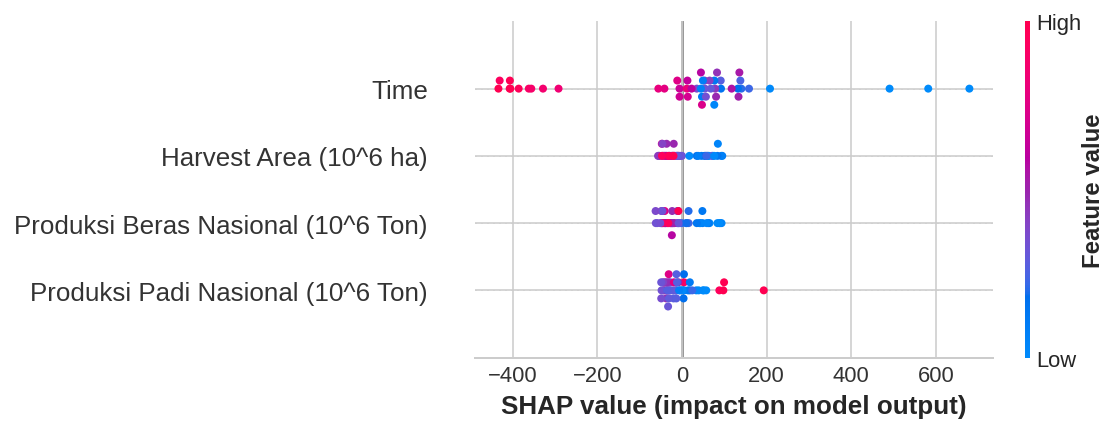

In [179]:
shap.summary_plot(shap_values6, x)

### Kumpulan Visualisasi

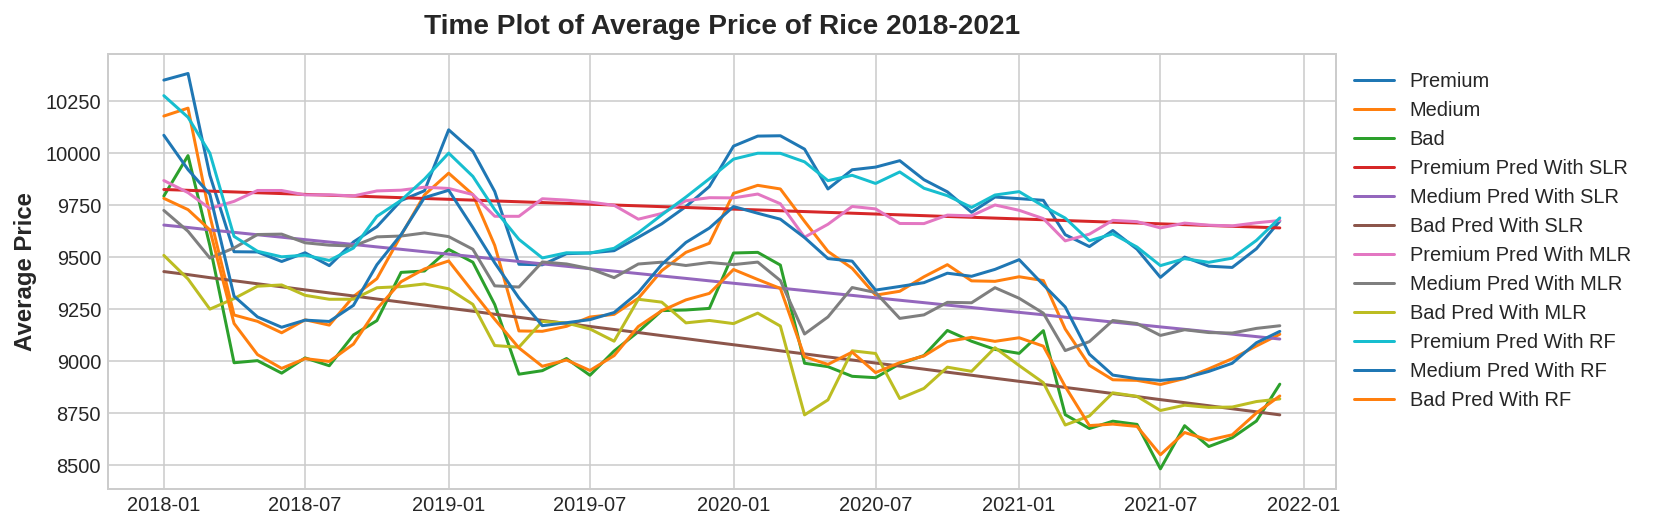

In [180]:
plt.plot(HargaBerasPremium,label='Premium') 
plt.plot(HargaBerasMedium,label='Medium') 
plt.plot(HargaBerasLuarkualitas,label='Bad') 
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Rice 2018-2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

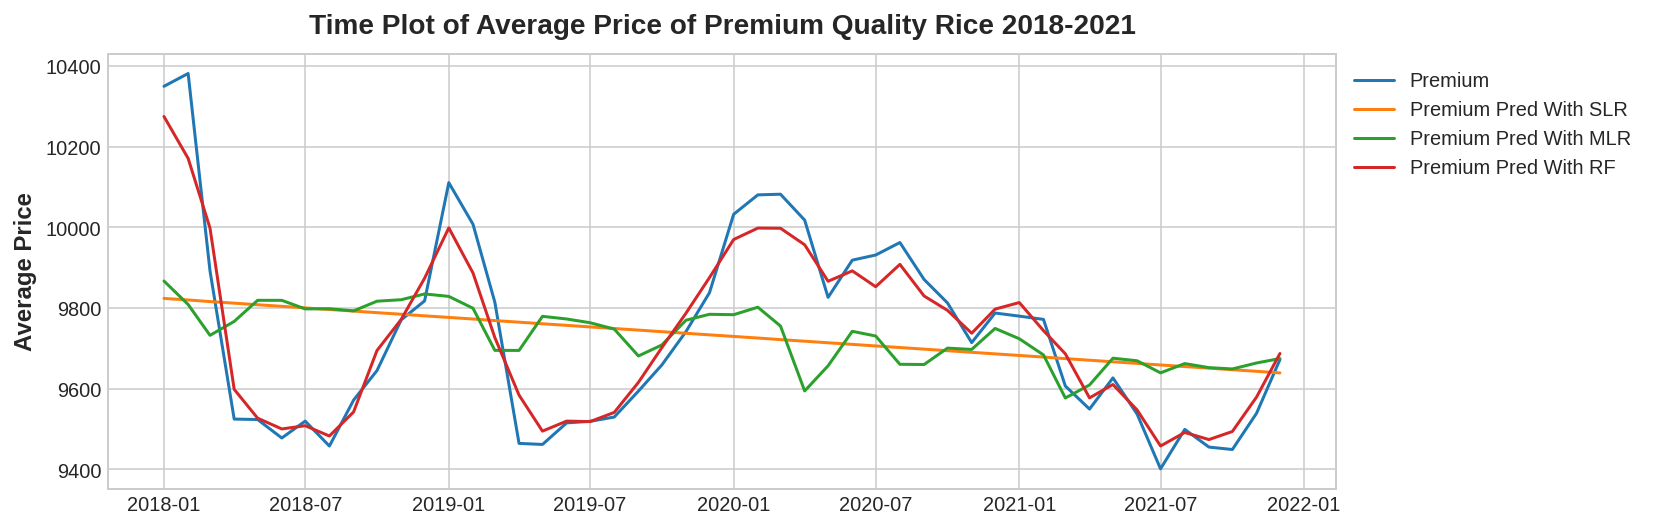

In [181]:
plt.plot(HargaBerasPremium,label='Premium') 
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.title('Time Plot of Average Price of Premium Quality Rice 2018-2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

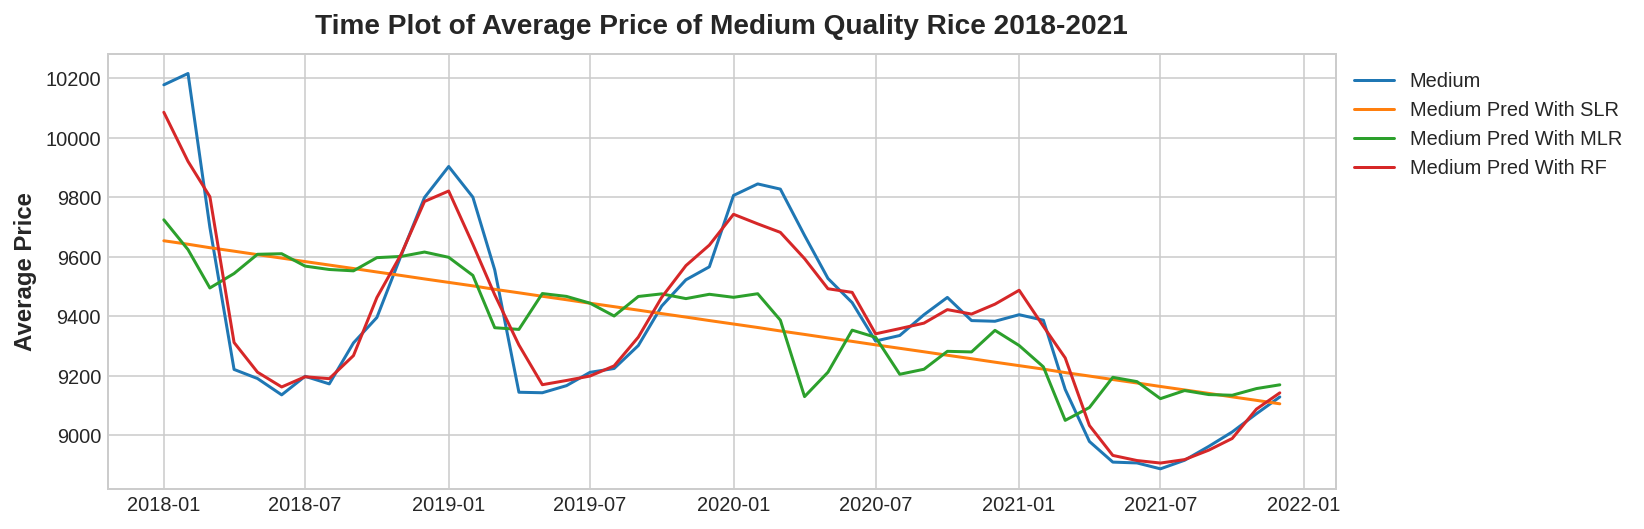

In [182]:
plt.plot(HargaBerasMedium,label='Medium') 
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.title('Time Plot of Average Price of Medium Quality Rice 2018-2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

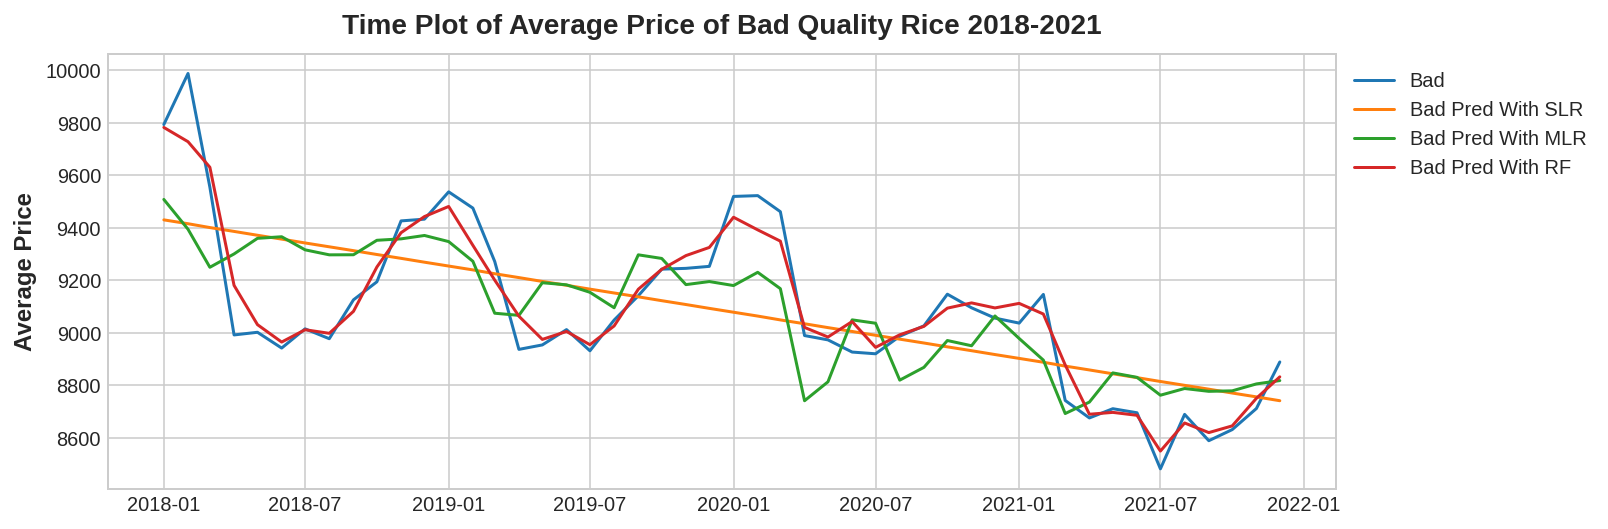

In [183]:
plt.plot(HargaBerasLuarkualitas,label='Bad') 
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Bad Quality Rice 2018-2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()